In [2]:
# importing necessary libraries for analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm 
from scipy.stats import pearsonr
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt
from pandas_ml import ConfusionMatrix
from sklearn.metrics import confusion_matrix
import itertools

# Use ggplot style for visulizations
plt.style.use('seaborn-dark')

In [12]:
# Import Syph data
data = pd.read_excel('Syph1.xlsx', index=False)

# Read the required columns
data = data[['sample_id', 'data_1', 'cutoff_1', 'data_2', 'cutoff_2']]

# Set new column names
data.columns = [['id', 'evo_data', 'evo_resp', 'rmp_data', 'rmp_resp']]

# Change negative and positive values to 0 and 1 respectively 
data = data.replace('POSITIVE', 1)
data = data.replace('Negative', 0)


# Print columns and head
print(data.columns)
data.head()

MultiIndex(levels=[['evo_data', 'evo_resp', 'id', 'rmp_data', 'rmp_resp']],
           labels=[[2, 0, 1, 3, 4]])


,id,evo_data,evo_resp,rmp_data,rmp_resp
0,17V0160300,0.06,0,0.02,0
1,17V0161263,0.18,0,0.02,0
2,17V0161328,0.06,0,0.02,0
3,17V0161690,0.06,0,0.02,0
4,17V0161691,0.06,0,0.02,0


In [13]:
# Describe the 5 point statistics of the dataset
data.describe()

,evo_data,evo_resp,rmp_data,rmp_resp
count,378.000000,378.000000,378.000000,378.000000
mean,0.128889,0.026455,0.064087,0.031746
std,0.341893,0.160697,0.277719,0.175556
min,0.060000,0.000000,0.010000,0.000000
25%,0.070000,0.000000,0.010000,0.000000
50%,0.070000,0.000000,0.020000,0.000000
75%,0.080000,0.000000,0.020000,0.000000
max,3.630000,1.000000,2.437000,1.000000


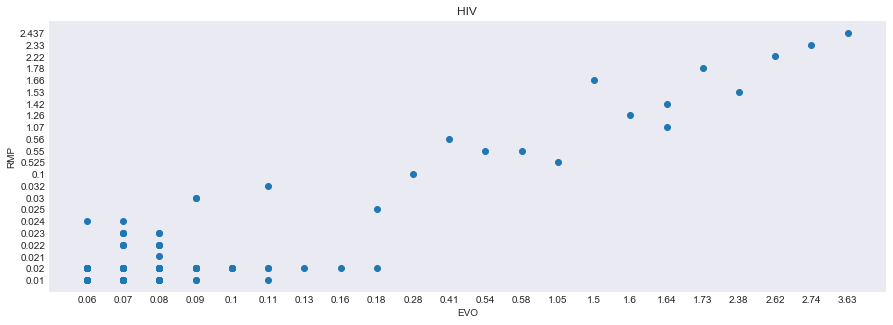

In [14]:
# Scatter plot between evo and rmp data readings 

from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
plt.scatter(data.evo_data, data.rmp_data)
plt.xlabel('EVO')
plt.ylabel('RMP')
plt.title('Syphillis')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2171b8d0>]],
      dtype=object)

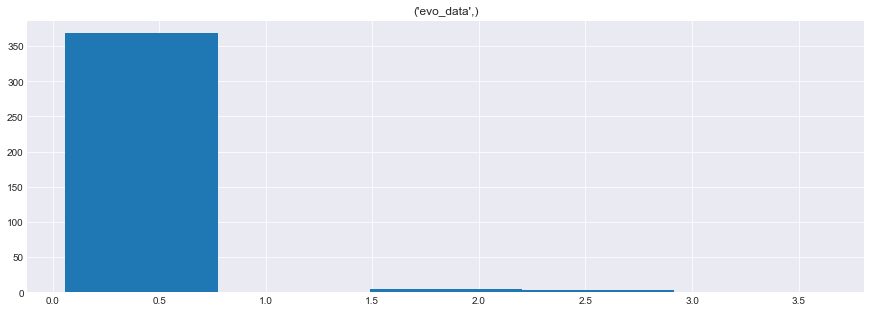

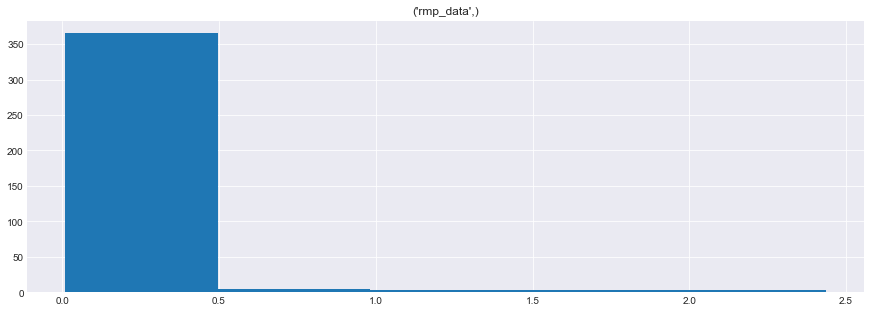

In [15]:
# Plot histograms to inspect the typical values

data['evo_data'].hist(bins=5)
data['rmp_data'].hist(bins=5)


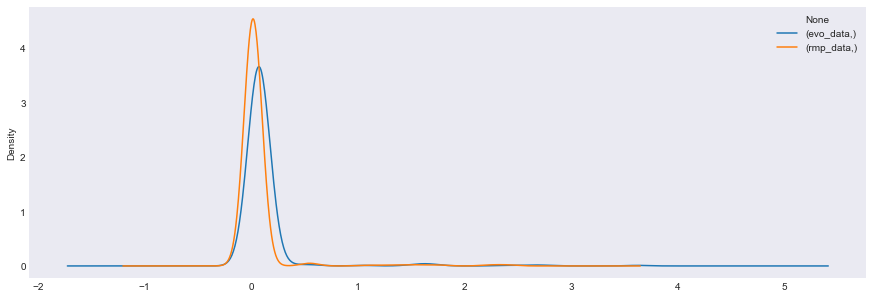

In [16]:
# Plot distributions as overlapping kde plots

kde = data[['evo_data', 'rmp_data']].copy()
kde.plot.kde()

In [17]:
# Convert data to numpy arrays and calculate pearson correlation coefficient

x = np.array(data.evo_data)
y = np.array(data.rmp_data)

In [18]:
# Pearson Correlation

corr, _ = pearsonr(x,y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.981


In [19]:
# Effect Size Measurement

# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s


d = cohend(y,x)
print('Cohens d: %.3f' % d)

Cohens d: -0.208


In [20]:
# Run Independant and dependant t-tests 

from scipy import stats
stats.ttest_ind(y,x)

Ttest_indResult(statistic=array([-2.86028685]), pvalue=array([0.00434959]))

In [21]:
stats.ttest_rel(y,x)

Ttest_relResult(statistic=array([-14.32204273]), pvalue=array([1.87611048e-37]))

In [22]:
# Calculate confusion and matrix and diagnosticsa

EVO=np.hstack(np.array(data['evo_resp']))
RMP=np.hstack(np.array(data['rmp_resp']))

cm = ConfusionMatrix(RMP, EVO)
print(cm)
cm.print_stats()

Predicted  False  True  __all__
Actual                         
False        364     2      366
True           4     8       12
__all__      368    10      378
population: 378
P: 12
N: 366
PositiveTest: 10
NegativeTest: 368
TP: 8
TN: 364
FP: 2
FN: 4
TPR: 0.6666666666666666
TNR: 0.994535519125683
PPV: 0.8
NPV: 0.9891304347826086
FPR: 0.00546448087431694
FDR: 0.2
FNR: 0.3333333333333333
ACC: 0.9841269841269841
F1_score: 0.7272727272727273
MCC: 0.722339787325555
informedness: 0.6612021857923498
markedness: 0.7891304347826087
prevalence: 0.031746031746031744
LRP: 122.0
LRN: 0.33516483516483514
DOR: 364.0
FOR: 0.010869565217391304


Confusion matrix, without normalization
[[364   2]
 [  4   8]]


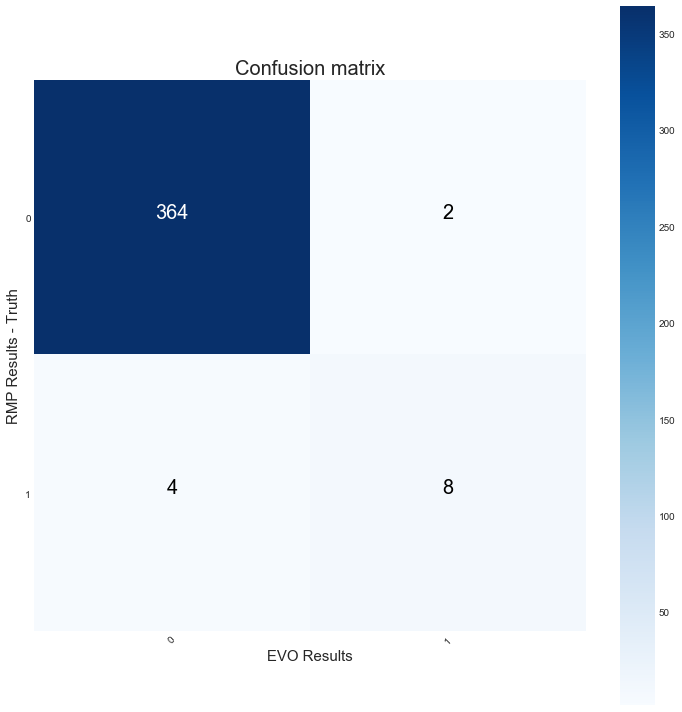

In [23]:
# Draw Confusion matrix for report
# Motivation for this visualization has been taken from stackoverflow discussion at:
# https://stackoverflow.com/questions/48817300/sklearn-plot-confusion-matrix-combined-across-trainingtest-sets

from pylab import rcParams
rcParams['figure.figsize'] = 10,10

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt ), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('RMP Results - Truth', fontsize=15)
    plt.xlabel('EVO Results', fontsize=15)


cm = confusion_matrix(RMP, EVO)

plt.figure()
plot_confusion_matrix(cm, classes = [0,1], title='Confusion matrix')